<a href="https://colab.research.google.com/github/konkuk-gaegul/First_project/blob/main/hynix_samsung_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rcParams

!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothic'
rcParams['axes.unicode_minus'] = False

font_manager._rebuild()

# 소숫점 둘 째 자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# 하이닉스 투자지표
hynix = pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/Investment_indicator.csv', index_col = 0)

In [ ]:
# 삼성전자 투자지표
samsung = pd.read_csv('/content/drive/MyDrive/data/samsung/005930_metrics_table.csv', index_col = 0)
samsung = samsung.T
samsung = samsung.sort_index(ascending=True)   # 인덱스 오름차순 정렬
a = []
b = []
ROE = []
ROIC = []
c = []
d = []
e = []

# % 단위로 조정
for i in range(10):
  a.append( samsung['유동비율'][i]*100 )
for i in range(10):
  b.append( samsung['부채비율'][i]*100 )
for i in range(10):
  ROE.append( samsung['ROE'][i]*100 )
for i in range(10):
  ROIC.append( samsung['ROIC'][i]*100 )
for i in range(10):
  c.append( samsung['영업이익률'][i]*100 )
for i in range(10):
  d.append( samsung['매출액증가율'][i]*100 )
for i in range(10):
  e.append( samsung['자기자본증가율'][i]*100 )

dicts = { '유동비율':a, '부채비율':b, 'ROE':ROE, 'ROIC':ROIC, '영업이익률':c, '매출액증가율':d, '자기자본증가율':e }
samsung = pd.DataFrame(dicts)
samsung.set_index(hynix.index, inplace=True)

samsung

,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율
2011/12,161.33,53.78,13.58,55.81,9.48,6.71,13.61
2012/12,185.94,49.05,19.63,96.31,14.44,21.88,19.91
2013/12,215.84,42.70,20.31,115.64,16.08,13.72,23.49
2014/12,221.38,37.08,13.92,83.19,12.14,-9.83,12.05
2015/12,247.14,35.25,10.64,77.53,13.16,-2.69,6.53
2016/12,258.54,35.87,11.78,87.54,14.49,0.60,7.76
2017/12,218.80,40.68,19.67,143.11,22.39,18.68,11.16
2018/12,252.89,36.97,17.90,124.22,24.16,1.75,15.51
2019/12,284.38,34.12,8.27,54.30,12.05,-5.48,6.11
2020/12,262.17,37.07,9.57,84.15,15.20,2.78,4.97


In [ ]:
# DB하이텍 투자지표
DBDB= pd.read_csv('/content/drive/MyDrive/data/samsung/Table.csv', index_col = 0)
DBDB = DBDB.T
DBDB = DBDB.sort_index(ascending=True)   # 인덱스 오름차순 정렬
DBDB.set_index(hynix.index, inplace=True)
DBDB

,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율
2011/12,31.15,289.22,-31.79,-4.19,-6.41,-10.94,-22.60
2012/12,55.66,298.00,-10.77,-1.63,-2.64,6.98,-5.57
2013/12,46.76,416.90,-40.56,-1.39,-1.95,-16.42,-29.61
2014/12,65.77,715.95,-63.80,7.49,8.03,14.98,-41.05
2015/12,138.40,287.57,49.88,19.45,18.75,17.42,110.48
2016/12,134.53,188.60,25.84,24.49,22.30,15.98,34.58
2017/12,243.53,118.07,24.17,20.95,21.07,-12.08,33.31
2018/12,244.51,91.00,15.55,14.19,16.88,-1.54,22.51
2019/12,194.01,68.91,16.23,18.60,22.45,20.64,15.45
2020/12,175.47,48.33,20.89,24.05,25.57,15.92,23.26


Text(0.5, 1.0, '반도체 3사 유동 비율')

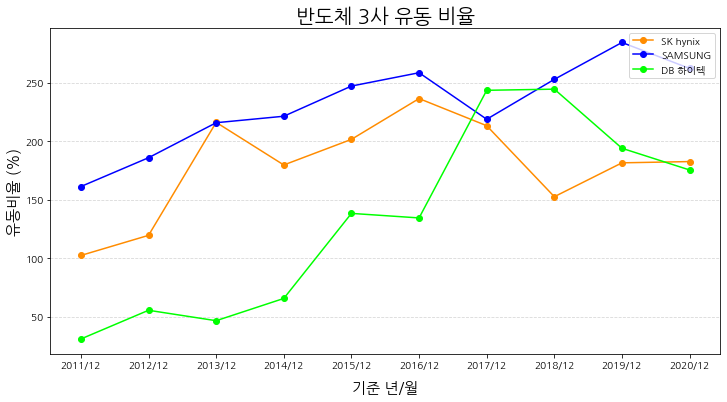

In [ ]:
# 반도체 3사 안정성 지표 중 유동비율을 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['유동비율(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['유동비율'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )
ax.plot(DBDB['유동비율'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )

plt.legend( loc = 'upper right')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('유동비율 (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 유동 비율', fontsize=20)

3사 모두 부채 대비 유동자산은 10년 전과 비교해 꾸준히 우상향하는 추세를 보인다.

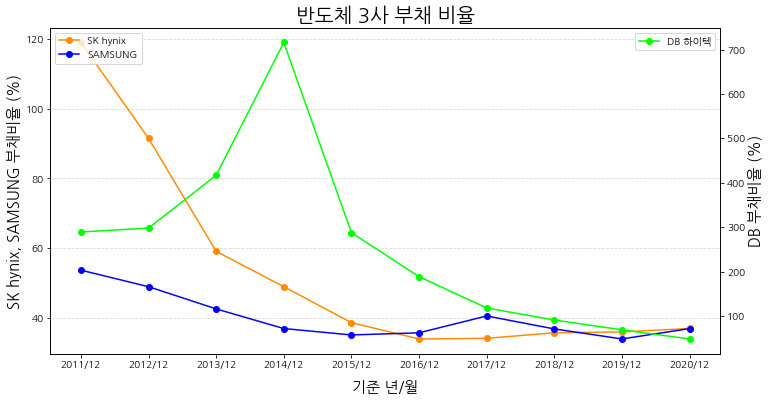

In [ ]:
# 반도체 3사 안정성 지표 중 부채비율을 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['부채비율(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['부채비율'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )

plt.legend( loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('SK hynix, SAMSUNG 부채비율 (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 부채 비율', fontsize=20)

# DB하이텍 부채비율이 700%가 넘어가서 따로 빼줍니다.
ax2 = ax.twinx()
ax2.plot(DBDB['부채비율'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )
plt.ylabel('DB 부채비율 (%)', labelpad=3, fontsize=15)
plt.legend( loc = 'upper right')

2000년대부터 꾸준히 성장하던 삼성은 부채비율이 일정한 반면

하이닉스는 현대그룹 왕자의 난(?)으로 분리된 만큼 초기에 부채비율이 상당한 것으로 보인다.

SK의 인수로 꾸준한 순항을 거듭하는 것으로 분석된다.

동부..그들은 대체...그래도 최근까지 많이 줄어들고 있는 추세..

DB하이텍 사업구조 개편 효과에 주목해보자. 2013년 중국시장 진출을 시작으로 국내 비중을 줄이고

해외시장 공략에 나선 성과가 2019년에 안정적인 부채비율을 보였다. 

Text(0.5, 1.0, '반도체 3사 ROE')

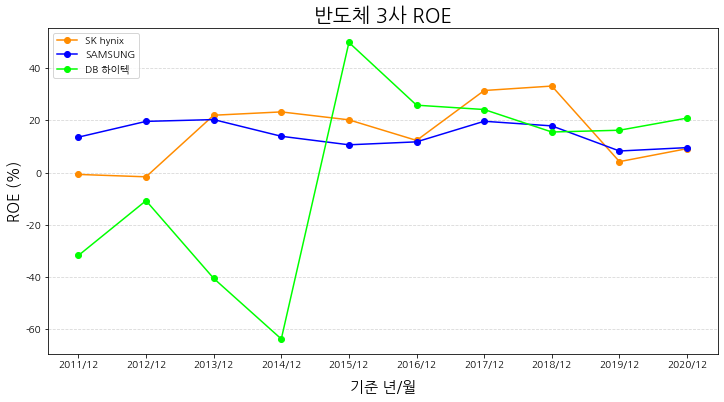

In [ ]:
# 수익성 지표의 ROE를 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['ROE(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['ROE'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )
ax.plot(DBDB['ROE'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )

plt.legend( loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('ROE (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 ROE', fontsize=20)

하이닉스와 삼성은 꾸준한 ROE를 보이는 반면

DB하이텍의 2013년 중국시장 진출을 시작으로 해외시장 공략에 나선 성과가 

2015년부터 높은 수익성을 나타냈다. 이후로 안정적인 ROE를 보인다.

Text(0.5, 1.0, '반도체 3사 ROIC')

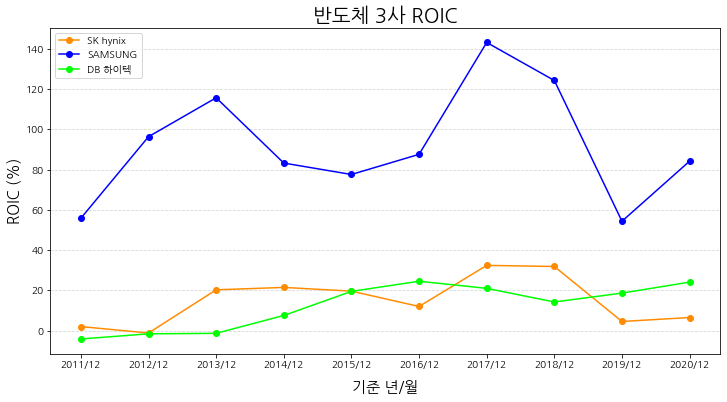

In [ ]:
# 수익성 지표의 ROIC를 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['ROIC(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['ROIC'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )
ax.plot(DBDB['ROIC'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )

plt.legend( loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('ROIC (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 ROIC', fontsize=20)

ROIC를 비교해보면 hynix와 DB보다 삼성전자가 압도적인 수치를 보인다. 

같은 액수의 영업자산을 투자하여 다른 기업보다 더 많은 수익을 올리고 있다는 의미가 되므로,

삼성전자의 실제 영업 능력이 우수하다고 판단된다.

아무래도 소비자에게 판매하는 디지털프라자 때문에 더욱 높은 수치를 기록한다고 생각된다.

Text(0.5, 1.0, '반도체 3사 영업이익률')

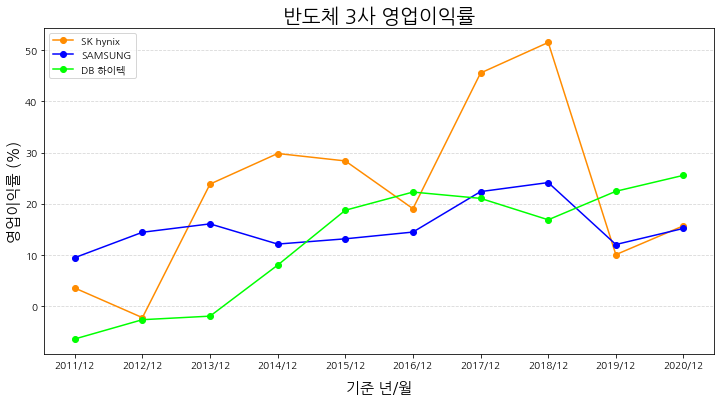

In [ ]:
# 수익성 지표의 영업이익률을 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['영업이익률(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['영업이익률'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )
ax.plot(DBDB['영업이익률'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )

plt.legend( loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('영업이익률 (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 영업이익률', fontsize=20)

탄탄한 재무구조를 갖는 삼성전자는 꾸준한 영업이익률을 보인다.

hynix는 2019년 무역전쟁의 여파로 영업이익률 실적이 전기보다 감소하였다.

하지만 꾸준한 수요 덕분에 마이너스는 면했다.

DB는 사업 구조 개편으로 인해 꾸준히 증가하는 영업이익률을 보인다.

*파운드리 기업인 DB는 hynix와 삼성전자 등의 완성 반도체 기업의*

*수요가 많을수록 매출액이 증가한다고 생각한다.*

Text(0.5, 1.0, '반도체 3사 매출액증가율')

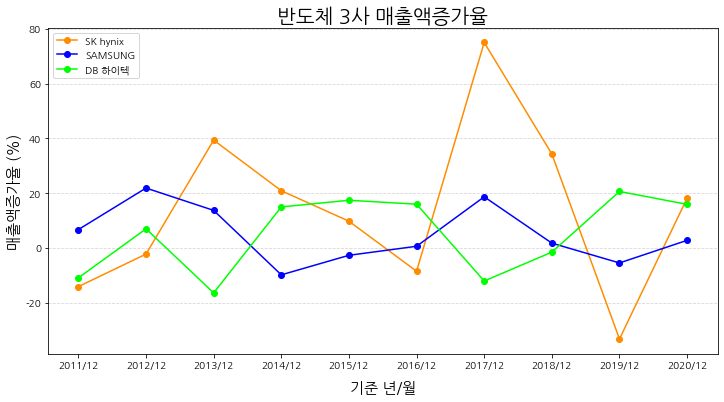

In [ ]:
# 성장 지표의 매출액증가율을 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['매출액 증가율(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['매출액증가율'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )
ax.plot(DBDB['매출액증가율'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )

plt.legend( loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('매출액증가율 (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 매출액증가율', fontsize=20)

Text(0.5, 1.0, '반도체 3사 자기자본증가율')

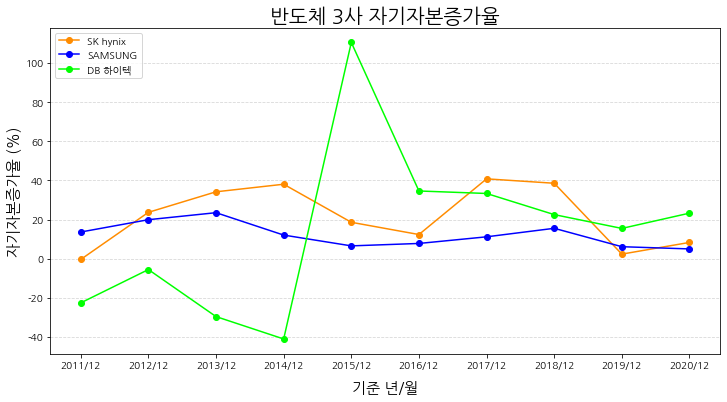

In [ ]:
# 성장 지표의 자기자본증가율을 비교해봅시다.
fig = plt.figure(figsize = (12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix['자기자본 증가율(%)'], color='darkorange', linewidth=1.5 , marker='o' , label = 'SK hynix' )
ax.plot(samsung['자기자본증가율'], color='blue', linewidth=1.5 , marker='o' , label = 'SAMSUNG' )
ax.plot(DBDB['자기자본증가율'], color='lime', linewidth=1.5 , marker='o' , label = 'DB 하이텍' )

plt.legend( loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

plt.xlabel('기준 년/월', labelpad=10, fontsize=15)
plt.ylabel('자기자본증가율 (%)', labelpad=3, fontsize=15)
plt.title('반도체 3사 자기자본증가율', fontsize=20)

DB는 2013년 경영악화로 인해 2조원의 부채를 떠안게 되었지만,

2015년 경영실적 완화로 인해 많은 양의 부채를 상환하고 흑자로 전환됐다.

